In [1]:
# !pip install pandas
# !pip install --upgrade pip
# !pip install seaborn
# !pip install scikit-learn
# !pip install matplotlib

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [14]:
# データの取り込み

In [15]:
df = pd.read_csv('./Data/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## データ概要

In [16]:
df.groupby("Type").count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


In [17]:
# １，２のクラスに属するデータのみ抽出
df = df[(df.Type == 1) | (df.Type == 2)]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2


In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15, # testデータの割合
                                                    random_state=100, 
                                                    stratify=y, # testデータのラベルの比率を一定にする
                                                    )


In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(124, 9)
(22, 9)
Type
2    65
1    59
Name: count, dtype: int64
Type
2    11
1    11
Name: count, dtype: int64


In [23]:
clf = DecisionTreeClassifier(
  criterion = 'gini', #分岐条件の指定
  splitter = 'best', #説明変数の選択方式（全部選択するか一部だけ無作為に選択するか）
  max_depth = 5, #木の深さ
  min_samples_split = 10, #ノードに必要な最小サンプル数
  min_samples_leaf = 5, #葉に必要な最小サンプル数
  random_state = None, #
)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

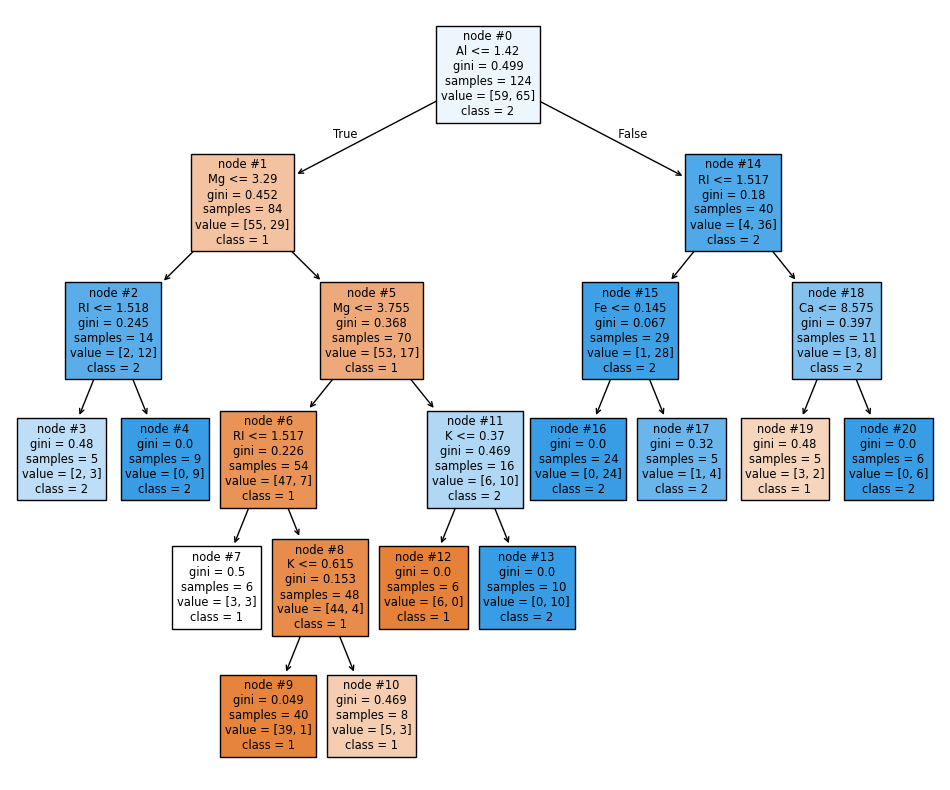

In [25]:
plt.figure(figsize=(12, 10))
plot_tree(
  clf,
  feature_names=X.columns,
  class_names=['1', '2'],
  # label='none',
  filled=True,
  # proportion=True,
  node_ids = True)
plt.show()

In [26]:
clf.predict(X_test)

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2])

In [27]:
clf.predict_proba(X_test)

array([[0.   , 1.   ],
       [0.975, 0.025],
       [0.   , 1.   ],
       [0.4  , 0.6  ],
       [0.   , 1.   ],
       [0.2  , 0.8  ],
       [0.   , 1.   ],
       [0.975, 0.025],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.2  , 0.8  ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.975, 0.025],
       [0.975, 0.025],
       [0.975, 0.025],
       [0.975, 0.025],
       [1.   , 0.   ],
       [0.   , 1.   ]])

In [28]:
clf.score(X_test, y_test)

0.7727272727272727